In [1]:
import sys
sys.path.insert(0, '../')
from bibliotecas import base_estudantes, job, magalu, alunos, petrobras, sns, np, pd, plt, yf, px, go, sp, wn, quandl, date, db
wn.filterwarnings('ignore')

In [2]:
df = pd.read_excel('./Dados/Base_Dados - Estudo Combustiveis.xlsx')
preco = pd.read_csv('./Dados/Dados Preco Combutivel.csv', sep=',')

In [12]:
preco['Data'] = pd.to_datetime(preco['Data'])

In [9]:
liq = ['DIESEL', 'ETANOL', 'GASOLINA']

dados = []
for i in liq:
    dados.append(preco[preco['Produto']==i]['Valor_Venda'].values)

dicio = {}
for i,n in enumerate(liq):
    dicio[n] = dados[i]

combustivel = pd.DataFrame(dicio)

In [4]:
a = [None for i in range(9)]

In [43]:
print(combustivel['GASOLINA'].tail(1))

116    6.392753
Name: GASOLINA, dtype: float64


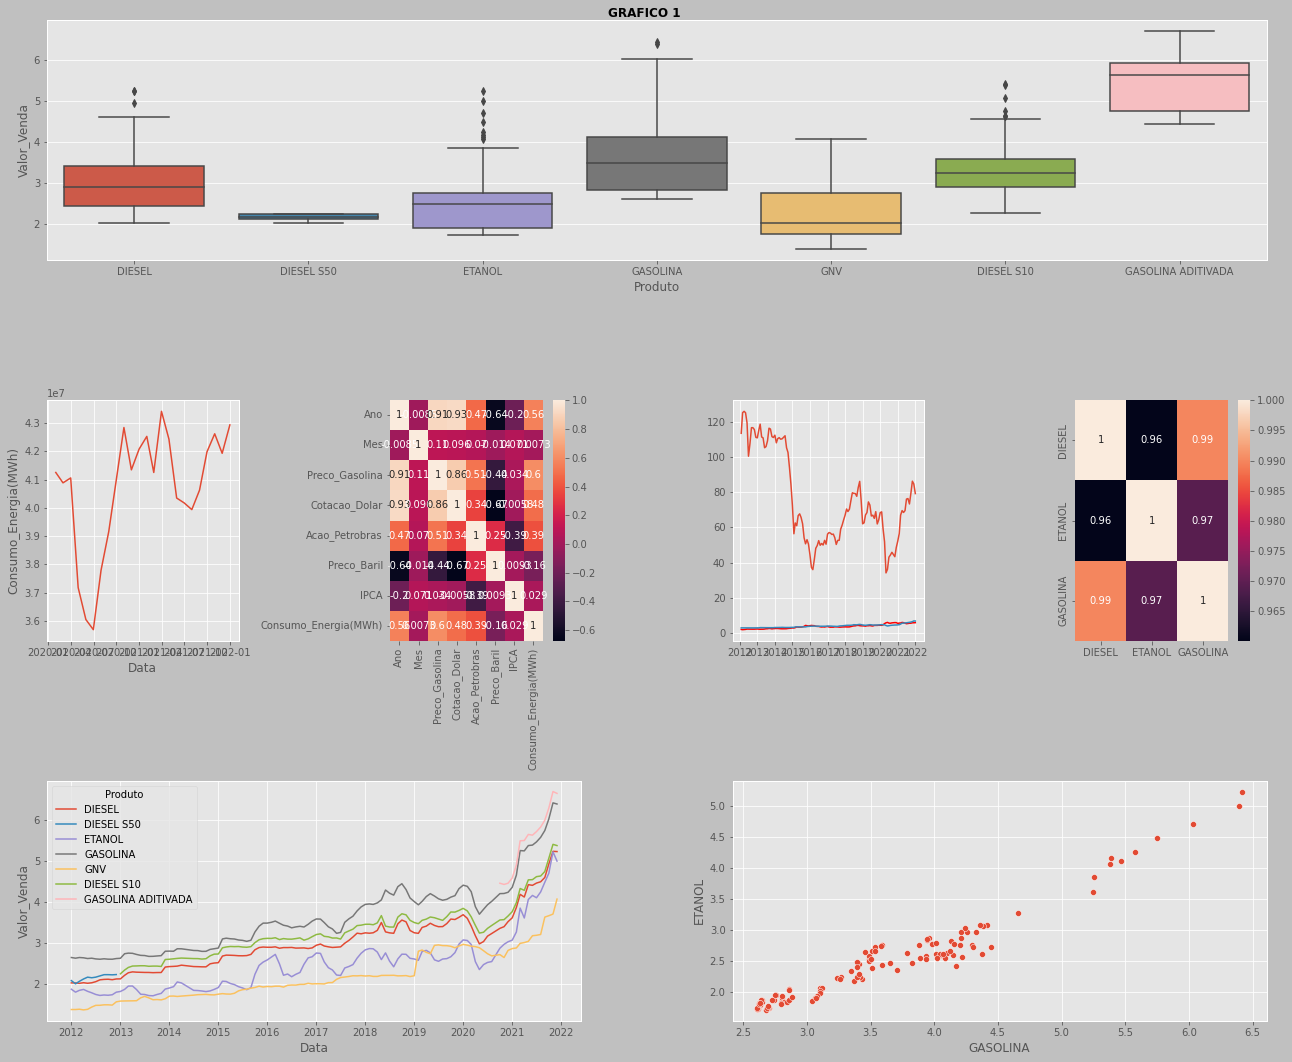

In [52]:
f= plt.figure(figsize=(18,15))
cor = sns.color_palette('husl',10)
# a.set_facecolor('gray')
f.set_facecolor('silver')
plt.suptitle('grafico 1'.upper(), fontweight="bold")
plt.style.use('ggplot')

a[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
sns.boxplot(data=preco, x='Produto', y='Valor_Venda')


a[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
sns.lineplot(data=df.query('2020<=Ano<=2022'), x='Data', y='Consumo_Energia(MWh)')



a[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
sns.heatmap(df.corr(), annot=True)

a[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
plt.plot(df['Data'], df['Cotacao_Dolar'], color='red')
plt.plot(df['Data'], df['Preco_Baril'])
plt.plot(df['Data'], df['Preco_Gasolina'])

a[4] = plt.subplot2grid((3,4), (1,3), colspan=1)
sns.heatmap(combustivel.corr(), annot=True)


a[5] = plt.subplot2grid((3,4), (2,0), colspan=2)
sns.lineplot(data=preco, x='Data', y='Valor_Venda', hue='Produto')

a[6] = plt.subplot2grid((3,4), (2,2), colspan=2)
sns.scatterplot(data=combustivel, x='GASOLINA', y='ETANOL')

# plt.subplot(3,2,1)
# plt.title('primeiro')
# sns.histplot(data=base, x='math score')

# plt.subplot(3,2,2)
# sns.lineplot(data=mag, x='Date', y='Close')

# plt.subplot(3,2,3)
# plt.title('numero 3')
# sns.lineplot(data=base, y='math score', x='race/ethnicity', hue='gender')

# plt.subplot(3,2,4)
# sns.boxplot(data=base, y='math score', x='race/ethnicity', hue='gender', order=sorted(base['race/ethnicity'].unique()))

# plt.subplot(3,2,5)
# m = {'female':'o', 'male':'X'}
# sns.scatterplot(data=base, x='math score', y='writing score', hue='gender', style='gender', markers=m)

# plt.subplot(3,2,6)
# sns.heatmap(base.corr(),cmap='magma_r', annot=True)
f.tight_layout()
# plt.subplot_tool()
# plt.subplots_adjust(hspace=0.3, wspace=0.3) #dar espaço entre os graficos

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

In [53]:
for i in range(1,(3*2)+1):
    print(i)

1
2
3
4
5
6
